In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/ip_files/data/data_without_outliers.csv')
print(df.shape)

(16997, 22251)


Split on train(70%) and test(30%) sets

In [0]:
y = df['class']

# rest of the data
X = df.loc[:, df.columns != 'class']


In [0]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)


free some of the much needed memory

In [0]:
del X
del y
del df

import gc
gc.collect()


23

# CLASSIFICATION

## KNN


Okay, let's start! We begin wilh **KNN** classifiers. We will run both weighted (distance) and non-weighted knn for different number of neighbors and see how will they behave.


We choose those values because, well, we need to start from somewhere. Also, higher values probably won't do well because of the number of samples of the class2

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import gc

error = []
ks = [3, 5, 6, 7, 8, 9, 10, 15]

for i in ks:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    
    pred_i = knn_i.predict(X_test)
    error.append(np.abs(np.mean(pred_i != y_test)))
    
    gc.collect()
    

Text(0, 0.5, 'Mean Absolute Error')

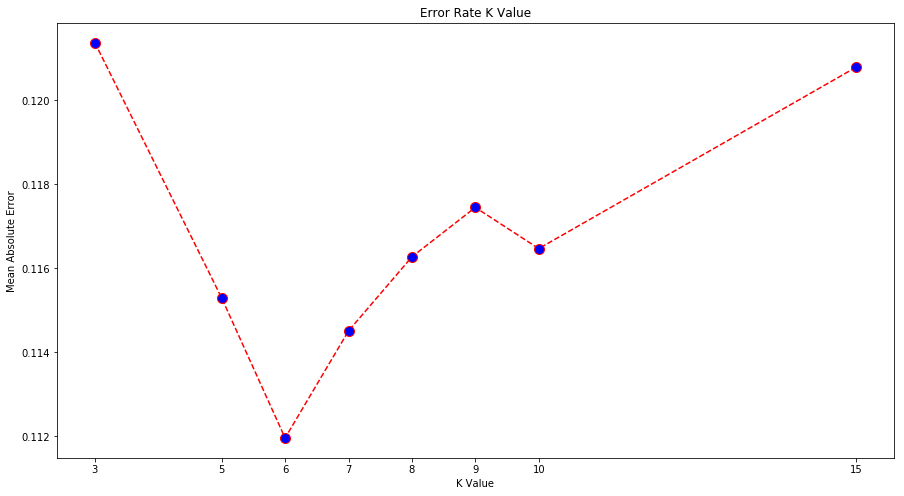

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(ks, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(ks)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

The results shown on the plot are good. There is also not a significant difference in error value for different **k** values. That can better be observed if we plot **y-axis** from 0 to 1. The best result is **k = 6**.

We will try KNN again, but this time we will add weights. Our weighting method is distance.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import gc

error_weighted = []
ks = [3, 5, 6, 7, 8, 9, 10, 15]

for i in ks:
    knn_i = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn_i.fit(X_train, y_train)
    
    pred_i = knn_i.predict(X_test)
    error_weighted.append(np.abs(np.mean(pred_i != y_test)))
    
    gc.collect()
    

Text(0, 0.5, 'Mean Absolute Error')

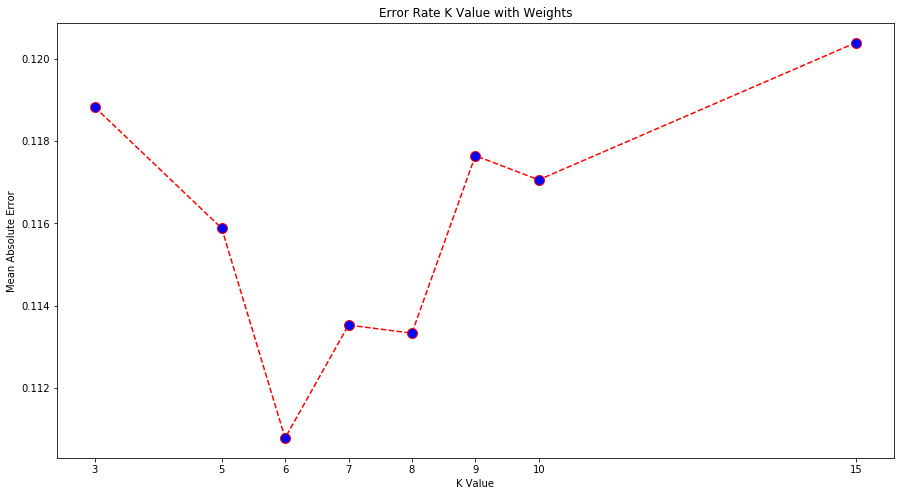

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(ks, error_weighted, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(ks)
plt.title('Error Rate K Value with Weights')  
plt.xlabel('K Value')  
plt.ylabel('Mean Absolute Error')

The results between this and non-weighted method are similar, but this one is slightly better.

Let's create what appears to be our best knn model. We will set k value to 6 and we will use distance as weight.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('accuracy train: {}'.format(np.round(knn.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8892
recall score: [0.8636 0.     0.0755 0.8231 0.9658 0.9831 0.7246]
f1_score: [0.9127 0.     0.1341 0.8279 0.9287 0.9546 0.8345]
confusion matrix: 
[[ 209    0    0    1    1   30    1]
 [   0    0    1    9    6    0    0]
 [   0    0   12  119   28    0    0]
 [   0    0    6 1061  222    0    0]
 [   0    0    1   79 2259    0    0]
 [   2    0    0    5    7  873    1]
 [   5    0    0    0    3   38  121]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The results are good, but there is a problem in classifing classes 2 and 3 as we can see.

Now we will save this model into pickle file

In [0]:
from joblib import dump, load
dump(knn, '/content/gdrive/My Drive/ip_files/models/knn_weighted_6neighbors.pkl')

# dtc = load('/content/gdrive/My Drive/ip_files/primer.pkl')

['/content/gdrive/My Drive/ip_files/models/knn_weighted_6neighbors.pkl']

## Naive Bayes

We continue with **Naive Bayes** classificators. NB classificators won't probably have very good results, because of the data (numerical), but we will see.

MultinomianNB:

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

print('accuracy train: {}'.format(np.round(mnb.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.7131
accuracy test: 0.6998
recall score: [0.9587 0.0625 0.5786 0.6827 0.593  0.9347 0.8802]
f1_score: [0.9063 0.0112 0.1818 0.6579 0.7395 0.9595 0.8622]
confusion matrix: 
[[ 232    7    0    0    0    2    1]
 [   0    1    6    9    0    0    0]
 [   0    8   92   53    6    0    0]
 [   0   67  323  880   19    0    0]
 [   0   79  431  442 1387    0    0]
 [  29    1    0    2    0  830   26]
 [   9    0    1    0    0   10  147]]


In [0]:
from joblib import dump
dump(mnb, '/content/gdrive/My Drive/ip_files/models/multinomialNB.pkl')

['/content/gdrive/My Drive/ip_files/models/multinomialNB.pkl']

This model is particularly bad at classifing class2, but okay overall.

ComplementNB:

In [0]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

cnb = ComplementNB()
cnb.fit(X_train, y_train)

y_pred = cnb.predict(X_test)

print('accuracy train: {}'.format(np.round(cnb.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.729
accuracy test: 0.718
recall score: [0.0289 0.     0.     0.8937 0.6939 0.991  0.    ]
f1_score: [0.0545 0.     0.     0.7055 0.7779 0.8141 0.    ]
confusion matrix: 
[[   7    0    0    9    0  226    0]
 [   0    0    0   13    3    0    0]
 [   1    0    0   86   72    0    0]
 [   0    0    0 1152  136    1    0]
 [   1    0    0  714 1623    1    0]
 [   5    0    0    3    0  880    0]
 [   1    0    0    0    0  166    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from joblib import dump
dump(cnb, '/content/gdrive/My Drive/ip_files/models/complementNB.pkl')

['/content/gdrive/My Drive/ip_files/models/complementNB.pkl']

cnb does have a little bit higher accuracy than mnb, but it fails to classify some classes.

The results we got are okay, but KNN gave us better results.

## Decision trees

Now, onto Decision trees. We start with gini as quality of split

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np


dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('accuracy train: {}'.format(np.round(dtc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
 

accuracy train: 1.0
accuracy test: 0.8294
recall score: [0.8099 0.     0.1572 0.7618 0.8965 0.9223 0.6647]
f1_score: [0.7809 0.     0.1529 0.7648 0.8971 0.9254 0.7003]
confusion matrix: 
[[ 196    0    0    1    3   33    9]
 [   0    0    1   12    3    0    0]
 [   0    7   25  101   26    0    0]
 [   1   16   88  982  201    0    1]
 [   1    2   54  179 2097    2    4]
 [  39    0    0    2    3  819   25]
 [  23    0    0    2    3   28  111]]


In [0]:
from joblib import dump
dump(dtc, '/content/gdrive/My Drive/ip_files/models/decisionTree_gini.pkl')

['/content/gdrive/My Drive/ip_files/models/decisionTree_gini.pkl']

We will also try entropy as a criterion

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np


dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('accuracy train: {}'.format(np.round(dtc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
 

accuracy train: 1.0
accuracy test: 0.8431
recall score: [0.7975 0.     0.2075 0.7696 0.9149 0.9358 0.6647]
f1_score: [0.7878 0.     0.2082 0.7796 0.9116 0.9301 0.6894]
confusion matrix: 
[[ 193    0    1    0    0   31   17]
 [   0    0    7    7    2    0    0]
 [   0    4   33   97   25    0    0]
 [   2   23   86  992  186    0    0]
 [   3    1   31  160 2140    3    1]
 [  30    0    0    0    1  831   26]
 [  20    0    0    0    2   34  111]]


In [0]:
from joblib import dump
dump(dtc, '/content/gdrive/My Drive/ip_files/models/decisionTree_entropy.pkl')

['/content/gdrive/My Drive/ip_files/models/decisionTree_entropy.pkl']

The entropy as a criterion is a little bit better, but both models are stuggling to classifiy classes 2 and 3 correctly.

Now, we would like to add class_weights. We will set parameter class_weight in DecisionTreeClassifier to 'balanced' meaning that sklearn will evaluate class weight for every class. We will try this approach with both gini and entropy.

Gini:


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np


dtc = DecisionTreeClassifier(criterion='gini', class_weight='balanced')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('accuracy train: {}'.format(np.round(dtc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
 

accuracy train: 1.0
accuracy test: 0.8047
recall score: [0.7686 0.125  0.2138 0.7067 0.882  0.911  0.5928]
f1_score: [0.7561 0.093  0.2024 0.7216 0.8779 0.9034 0.6326]
confusion matrix: 
[[ 186    0    0    1    1   39   15]
 [   0    2    3   11    0    0    0]
 [   0    4   34   85   36    0    0]
 [   0   18   99  911  258    3    0]
 [   3    3   41  227 2063    2    0]
 [  45    0    0    1    1  809   32]
 [  16    0    0    0    2   50   99]]


In [0]:
from joblib import dump
dump(dtc, '/content/gdrive/My Drive/ip_files/models/decisionTree_balanced_gini.pkl')

['/content/gdrive/My Drive/ip_files/models/decisionTree_balanced_gini.pkl']

Entropy:

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np


dtc = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('accuracy train: {}'.format(np.round(dtc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
 

accuracy train: 1.0
accuracy test: 0.8233
recall score: [0.7769 0.0625 0.1698 0.7192 0.8961 0.9414 0.7425]
f1_score: [0.7983 0.0465 0.172  0.7351 0.8868 0.9294 0.7654]
confusion matrix: 
[[ 188    0    0    0    6   39    9]
 [   0    1    2   10    3    0    0]
 [   0    4   27   98   30    0    0]
 [   1   16   93  927  251    1    0]
 [   2    6   32  198 2096    5    0]
 [  27    0    0    0    1  836   24]
 [  11    0    1    0    1   30  124]]


In [0]:
from joblib import dump
dump(dtc, '/content/gdrive/My Drive/ip_files/models/decisionTree_balanced_entropy.pkl')

['/content/gdrive/My Drive/ip_files/models/decisionTree_balanced_entropy.pkl']

The results have gotten worse. We menaged to classify some instances of the class2 correctly, but with price.

## SVM

The next model will be **SVM**. Classification will start with **rbf** kernel, and then we will try others.


### rbf kernel

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=100, kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9781
accuracy test: 0.9555
recall score: [0.9669 0.25   0.7421 0.9054 0.9914 0.9955 0.8802]
f1_score: [0.975  0.3636 0.8027 0.9321 0.9685 0.9839 0.9363]
confusion matrix: 
[[ 234    0    0    0    0    8    0]
 [   0    4    0    7    5    0    0]
 [   0    1  118   24   16    0    0]
 [   0    1   13 1167  108    0    0]
 [   0    0    4   16 2319    0    0]
 [   2    0    0    0    2  884    0]
 [   2    0    0    1    0   17  147]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_rbf_C100_gamaScale.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_rbf_C100_gamaScale.pkl']

Lets increase C parameter.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=300, kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.993
accuracy test: 0.9588
recall score: [0.9835 0.1875 0.7484 0.9255 0.9846 0.9966 0.8922]
f1_score: [0.9814 0.3    0.8095 0.9361 0.9711 0.9877 0.9401]
confusion matrix: 
[[ 238    0    0    0    0    4    0]
 [   0    3    0    9    4    0    0]
 [   0    0  119   26   14    0    0]
 [   0    1   12 1193   83    0    0]
 [   0    0    4   32 2303    0    0]
 [   2    0    0    0    0  885    1]
 [   3    0    0    0    0   15  149]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_rbf_C300_gamaScale.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_rbf_C300_gamaScale.pkl']

This model has very high accuracy. It is also out best model so far in classifying class two (Recall gor class2 is not high though).

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np


clf = SVC(C=100, kernel='rbf', gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9817
accuracy test: 0.9524
recall score: [0.9876 0.1875 0.7799 0.9279 0.9675 0.9932 0.8982]
f1_score: [0.9835 0.2609 0.7702 0.9239 0.9681 0.9871 0.9434]
confusion matrix: 
[[ 239    0    0    0    0    3    0]
 [   0    3    3    8    2    0    0]
 [   0    1  124   24   10    0    0]
 [   0    1   31 1196   61    0    0]
 [   0    2    5   69 2263    0    0]
 [   3    0    0    2    0  882    1]
 [   2    0    0    1    0   14  150]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_rbf_C100_gamaScale_balancedWeights.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_rbf_C100_gamaScale_balancedWeights.pkl']

The results are slighly worse when we balance weights

Increase C parameter. That parameter represents the penalty for errors in classification. Lower the C the lower accuracy on train set 

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np


clf = SVC(C=300, kernel='rbf', gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9895
accuracy test: 0.9561
recall score: [0.9793 0.1875 0.761  0.9465 0.9658 0.9955 0.9102]
f1_score: [0.9793 0.2727 0.7934 0.9324 0.9693 0.9872 0.95  ]
confusion matrix: 
[[ 237    0    0    0    0    5    0]
 [   0    3    2    9    2    0    0]
 [   0    1  121   27   10    0    0]
 [   0    1   17 1220   51    0    0]
 [   1    1    6   72 2259    0    0]
 [   3    0    0    0    0  884    1]
 [   1    0    0    0    0   14  152]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_rbf_C300_gamaScale_balancedWeights.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_rbf_C300_gamaScale_balancedWeights.pkl']

and now we will decrease C parameter (make margine larger)

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np


clf = SVC(C=10, kernel='rbf', gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9485
accuracy test: 0.9318
recall score: [0.9959 0.5625 0.8239 0.851  0.9778 0.9459 0.8802]
f1_score: [0.8877 0.2045 0.7443 0.9104 0.9613 0.9683 0.9363]
confusion matrix: 
[[ 241    0    0    0    0    1    0]
 [   0    9    2    3    2    0    0]
 [   0    6  131   10   12    0    0]
 [   0   29   46 1097  117    0    0]
 [   0   28   14   10 2287    0    0]
 [  46    0    0    1    1  840    0]
 [  14    0    0    0    0    6  147]]


We got very good results here. Every model kinda struggles to classify elements of class2. The one where C = 10 did classify the larger number of patterns of class2, but that model also made a lot of mistakes in that classification (look at recall and f1 score)

### poly kernel

Now, polynomial kernel, gamma value is 'scale'. We will see wich degree will give us the best result

In [0]:
from sklearn.svm import SVC
import numpy as np

error = []
degrees = [1, 2, 3, 4, 5, 6]

for d in degrees:
    clf = SVC(C=100, kernel='poly', degree=d, gamma='scale')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    error.append(np.abs(np.mean(y_pred != y_test)))

Text(0, 0.5, 'Mean Absolute Error')

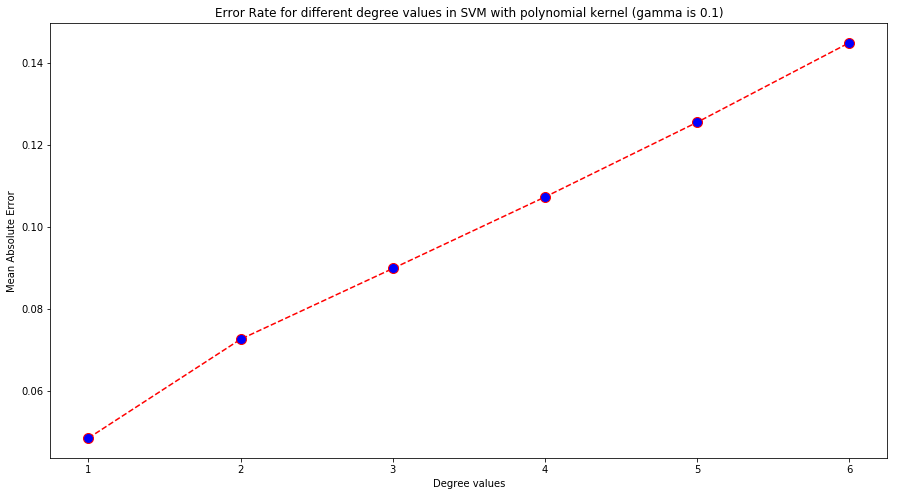

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(degrees, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(degrees)
plt.title('Error Rate for different degree values in SVM with polynomial kernel (gamma is 0.1)')  
plt.xlabel('Degree values')  
plt.ylabel('Mean Absolute Error')

The results are very good, but can we do better?

Everything is the same, we will just balance classes

In [0]:
from sklearn.svm import SVC
import numpy as np

error = []
degrees = [1, 2, 3, 4, 5, 6]

for d in degrees:
    clf = SVC(C=100, kernel='poly', degree=d, gamma='scale', class_weight='balanced')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    error.append(np.abs(np.mean(y_pred != y_test)))

Text(0, 0.5, 'Mean Absolute Error')

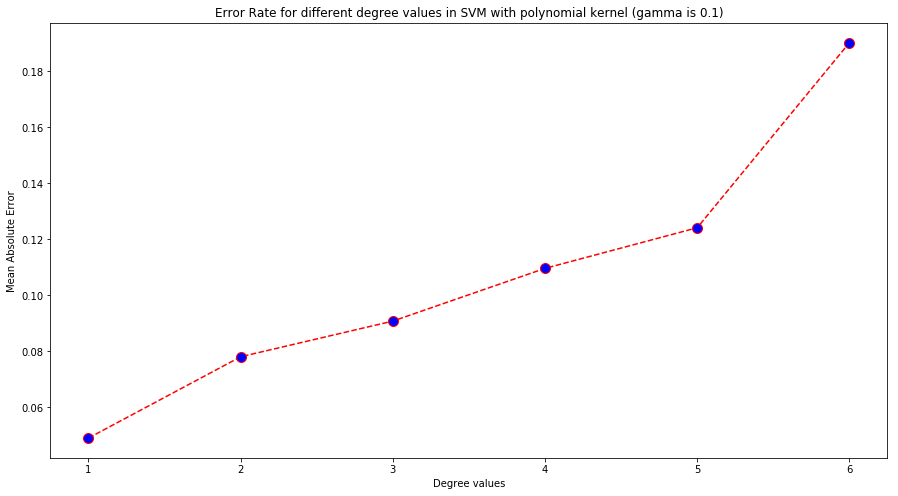

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))  
plt.plot(degrees, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.xticks(degrees)
plt.title('Error Rate for different degree values in SVM with polynomial kernel (gamma is 0.1)')  
plt.xlabel('Degree values')  
plt.ylabel('Mean Absolute Error')

Results on non-balanced data are a little bit better. Poly with degree ONE gave us very good results.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=100, kernel='poly', gamma='scale', degree=1, class_weight=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9673
accuracy test: 0.9516
recall score: [0.9504 0.375  0.6981 0.8953 0.9953 0.991  0.8623]
f1_score: [0.9705 0.5    0.7872 0.9277 0.966  0.9783 0.9201]
confusion matrix: 
[[ 230    0    0    0    0   11    1]
 [   0    6    0    4    6    0    0]
 [   0    1  111   29   18    0    0]
 [   0    1    9 1154  125    0    0]
 [   0    0    3    8 2328    0    0]
 [   1    0    0    3    3  880    1]
 [   1    0    0    1    1   20  144]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_poly_C100_gamaScale_degree1.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_poly_C100_gamaScale_degree1.pkl']

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=300, kernel='poly', gamma='scale', degree=1, class_weight=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9787
accuracy test: 0.9547
recall score: [0.9752 0.5    0.6918 0.9085 0.988  0.9944 0.8982]
f1_score: [0.9813 0.5714 0.7692 0.9308 0.9671 0.9855 0.9434]
confusion matrix: 
[[ 236    0    0    0    0    6    0]
 [   0    8    0    3    5    0    0]
 [   0    2  110   29   18    0    0]
 [   0    2   11 1171  105    0    0]
 [   0    0    6   22 2311    0    0]
 [   2    0    0    1    1  883    1]
 [   1    0    0    1    0   15  150]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_poly_C300_gamaScale_degree1.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_poly_C300_gamaScale_degree1.pkl']

These are good results. Model with larger C value classify class2 better (look at f score and recall), and has higher accuracy on train and test sets.

Let's increase C even more.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=600, kernel='poly', gamma='scale', degree=1, class_weight=None)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9849
accuracy test: 0.9522
recall score: [0.9793 0.4375 0.6918 0.9054 0.9838 0.9966 0.8922]
f1_score: [0.9793 0.4516 0.7432 0.9269 0.9666 0.9872 0.9401]
confusion matrix: 
[[ 237    0    0    0    0    5    0]
 [   0    7    0    4    5    0    0]
 [   0    4  110   29   16    0    0]
 [   0    4   18 1167  100    0    0]
 [   0    0    9   29 2301    0    0]
 [   2    0    0    0    0  885    1]
 [   3    0    0    0    0   15  149]]


now balanced, we will change C parameter

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=100, kernel='poly', gamma='scale', degree=1, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9716
accuracy test: 0.951
recall score: [0.9876 0.5625 0.7547 0.8906 0.9842 0.9921 0.9042]
f1_score: [0.9835 0.4    0.7339 0.9243 0.968  0.9882 0.9467]
confusion matrix: 
[[ 239    0    0    0    0    3    0]
 [   0    9    1    2    4    0    0]
 [   0    5  120   18   16    0    0]
 [   0   10   36 1148   95    0    0]
 [   0    5   11   21 2302    0    0]
 [   2    0    0    4    0  881    1]
 [   3    0    0    2    0   11  151]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_poly_C100_gamaScale_degree1_balancedWeights.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_poly_C100_gamaScale_degree1_balancedWeights.pkl']

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=300, kernel='poly', gamma='scale', degree=1, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.981
accuracy test: 0.9473
recall score: [0.9835 0.375  0.6981 0.8968 0.9778 0.9932 0.9042]
f1_score: [0.9754 0.3158 0.6959 0.9186 0.966  0.9888 0.9467]
confusion matrix: 
[[ 238    0    0    0    0    4    0]
 [   0    6    2    4    4    0    0]
 [   0    4  111   28   16    0    0]
 [   0    9   35 1156   89    0    0]
 [   0    3   12   37 2287    0    0]
 [   3    0    0    2    0  882    1]
 [   5    0    0    1    0   10  151]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_poly_C300_gamaScale_degree1_balancedWeights.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_poly_C300_gamaScale_degree1_balancedWeights.pkl']

Results with balanced class weights are also good, but I would say that the model with non-balanced class weights and C = 300 is our best model, out of all SVCs with poly kernels.

### Linear kernel


In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=100, kernel='linear', gamma='scale')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.9384
recall score: [0.9793 0.375  0.6667 0.8991 0.9594 0.9955 0.8982]
f1_score: [0.9773 0.3243 0.6463 0.908  0.9573 0.9872 0.9434]
confusion matrix: 
[[ 237    0    0    0    0    5    0]
 [   0    6    2    3    5    0    0]
 [   0    4  106   30   19    0    0]
 [   0    8   41 1159   81    0    0]
 [   0    3   20   72 2244    0    0]
 [   3    0    0    0    0  884    1]
 [   3    0    0    0    0   14  150]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/svm_linear_C100_gamaScale.pkl')

['/content/gdrive/My Drive/ip_files/models/svm_linear_C100_gamaScale.pkl']

now let's try balanced class weights

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=100, kernel='linear', gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.9384
recall score: [0.9793 0.375  0.6667 0.8991 0.9594 0.9955 0.8982]
f1_score: [0.9773 0.3243 0.6463 0.908  0.9573 0.9872 0.9434]
confusion matrix: 
[[ 237    0    0    0    0    5    0]
 [   0    6    2    3    5    0    0]
 [   0    4  106   30   19    0    0]
 [   0    8   41 1159   81    0    0]
 [   0    3   20   72 2244    0    0]
 [   3    0    0    0    0  884    1]
 [   3    0    0    0    0   14  150]]


Oddly enough, we got the same results for balanced and non-balanced linear svm.

Increase C parameter and try again.

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = SVC(C=300, kernel='linear', gamma='scale', class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.9384
recall score: [0.9793 0.375  0.6667 0.8991 0.9594 0.9955 0.8982]
f1_score: [0.9773 0.3243 0.6463 0.908  0.9573 0.9872 0.9434]
confusion matrix: 
[[ 237    0    0    0    0    5    0]
 [   0    6    2    3    5    0    0]
 [   0    4  106   30   19    0    0]
 [   0    8   41 1159   81    0    0]
 [   0    3   20   72 2244    0    0]
 [   3    0    0    0    0  884    1]
 [   3    0    0    0    0   14  150]]


This result is the same as the others. This model is very good but poly and rbf are a little bit better

## Neural networks

Next in line are Neural networks. We will create different models with differents solvers.
First, we create a model with default values.

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

clf = MLPClassifier()
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 1.0
accuracy test: 0.9337
recall score: [0.9545 0.     0.3836 0.8984 0.9765 0.9921 0.8802]
f1_score: [0.9665 0.     0.5422 0.8998 0.9517 0.9827 0.9363]
confusion matrix: 
[[ 231    0    0    0    0   11    0]
 [   0    0    1   10    5    0    0]
 [   0    0   61   61   37    0    0]
 [   0    0    3 1158  128    0    0]
 [   0    0    1   54 2284    0    0]
 [   3    0    0    2    2  881    0]
 [   2    0    0    0    5   13  147]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The results are okay. No patterns are classified as class2. Class3 is also badly classified.

Now, we will try different solvers. Hidden layers will also be changed. Let's add that we are expecting the best results with adam solver because that solver usually gives as good results on larga datasets.  

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(n // 16, n // 64), activation='relu')
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

There is **not enough RAM to run this block of code**, so we will continue with other solvers. 

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='sgd', hidden_layer_sizes=(n // 16, n // 64), activation='relu')
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.4664
accuracy test: 0.4612
recall score: [0.0496 0.     0.     0.     0.9996 0.0023 0.    ]
f1_score: [0.0941 0.     0.     0.     0.63   0.0045 0.    ]
confusion matrix: 
[[  12    0    0    0  230    0    0]
 [   0    0    0    0   16    0    0]
 [   0    0    0    0  159    0    0]
 [   0    0    0    0 1289    0    0]
 [   0    0    0    0 2338    1    0]
 [   1    0    0    0  885    2    0]
 [   0    0    0    0  166    1    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(n // 16, n // 64), activation='relu')
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 1.0
accuracy test: 0.9488
recall score: [0.9876 0.     0.4717 0.9279 0.9782 0.9955 0.9401]
f1_score: [0.9795 0.     0.6024 0.9243 0.9626 0.9933 0.9662]
confusion matrix: 
[[ 239    0    0    0    0    3    0]
 [   0    0    0   11    5    0    0]
 [   0    0   75   47   37    0    0]
 [   0    0    9 1196   84    0    0]
 [   0    0    6   45 2288    0    0]
 [   3    0    0    0    0  884    1]
 [   4    0    0    0    1    5  157]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/neuralNetwork_solverAdam_activationRelu_layers_n16_n64.pkl')

['/content/gdrive/My Drive/ip_files/models/neuralNetwork_solverAdam_activationRelu_layers_n16_n64.pkl']

Now we will create model with the best solver, but we will change activation function to tanh and then to logistic.

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='tanh', hidden_layer_sizes=(n // 16, n // 64))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.706
accuracy test: 0.6739
recall score: [0.0868 0.     0.     0.0853 0.9675 0.9944 0.9581]
f1_score: [0.1556 0.     0.     0.1478 0.7616 0.9949 0.5829]
confusion matrix: 
[[  21    0    0    0    0    2  219]
 [   0    0    0    2   14    0    0]
 [   0    0    0   11  148    0    0]
 [   0    0    0  110 1179    0    0]
 [   0    0    0   76 2263    0    0]
 [   2    0    0    0    0  883    3]
 [   5    0    0    0    0    2  160]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='logistic', hidden_layer_sizes=(n // 16, n // 64))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9631
accuracy test: 0.9251
recall score: [1.     0.     0.     0.8914 0.9812 0.9921 0.9042]
f1_score: [0.9878 0.     0.     0.9148 0.9341 0.9877 0.9467]
confusion matrix: 
[[ 242    0    0    0    0    0    0]
 [   0    0    0    6   10    0    0]
 [   0    0    0   26  133    0    0]
 [   0    0    4 1149  136    0    0]
 [   0    0    2   42 2295    0    0]
 [   5    0    0    0    1  881    1]
 [   1    0    0    0    0   15  151]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


No improvments, these models are worse than the adam one.

Let's play with hidden layers now.

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(n // 64))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9973
accuracy test: 0.94
recall score: [0.9669 0.     0.4591 0.917  0.9731 0.9944 0.8743]
f1_score: [0.975  0.     0.5887 0.9092 0.9577 0.9871 0.9299]
confusion matrix: 
[[ 234    0    0    0    2    6    0]
 [   0    0    0   12    4    0    0]
 [   0    0   73   51   35    0    0]
 [   0    0   16 1182   91    0    0]
 [   0    0    0   63 2276    0    0]
 [   3    0    0    1    0  883    1]
 [   1    0    0    2    6   12  146]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(n // 32))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9999
accuracy test: 0.9459
recall score: [0.9876 0.     0.4277 0.9279 0.9799 0.9887 0.9042]
f1_score: [0.9637 0.     0.5643 0.9214 0.9644 0.9865 0.9497]
confusion matrix: 
[[ 239    0    0    0    0    3    0]
 [   0    0    0   13    3    0    0]
 [   0    0   68   58   33    0    0]
 [   0    0    7 1196   85    1    0]
 [   0    0    7   40 2292    0    0]
 [  10    0    0    0    0  878    0]
 [   5    0    0    0    1   10  151]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(n // 32, n // 64))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9972
accuracy test: 0.9488
recall score: [0.9835 0.     0.522  0.9279 0.9756 0.9955 0.9341]
f1_score: [0.9814 0.     0.664  0.9207 0.9625 0.991  0.9659]
confusion matrix: 
[[ 238    0    0    0    0    4    0]
 [   0    0    1   11    4    0    0]
 [   0    0   83   44   32    0    0]
 [   0    2    7 1196   84    0    0]
 [   0    0    0   57 2282    0    0]
 [   2    0    0    1    1  884    0]
 [   3    0    0    0    0    8  156]]


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(n // 16, n // 64, n // 128))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 1.0
accuracy test: 0.9543
recall score: [0.9835 0.1875 0.6415 0.9286 0.9765 0.9955 0.9521]
f1_score: [0.9774 0.1714 0.6869 0.9322 0.9696 0.9955 0.9755]
confusion matrix: 
[[ 238    0    1    0    0    3    0]
 [   0    3    0    8    5    0    0]
 [   0    9  102   30   18    0    0]
 [   0    6   23 1197   63    0    0]
 [   0    1   10   44 2284    0    0]
 [   2    0    2    0    0  884    0]
 [   5    0    0    0    2    1  159]]


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/neuralNetwork_solverAdam_activationRelu_layers_n16_n64_n128.pkl')

['/content/gdrive/My Drive/ip_files/models/neuralNetwork_solverAdam_activationRelu_layers_n16_n64_n128.pkl']

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(n // 32, n // 64, n // 128))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9597
accuracy test: 0.9327
recall score: [0.9835 0.     0.0314 0.9449 0.9692 0.9966 0.8623]
f1_score: [0.9695 0.     0.0606 0.8907 0.9667 0.9883 0.9231]
confusion matrix: 
[[ 238    0    0    0    0    3    1]
 [   0    0    0   12    4    0    0]
 [   0    0    5  144   10    0    0]
 [   0    0    1 1218   70    0    0]
 [   0    0    0   72 2267    0    0]
 [   3    0    0    0    0  885    0]
 [   8    0    0    0    0   15  144]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(n // 8, n // 32, n // 64, n // 128))
clf.fit(X_train, y_train)
                    
y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9154
accuracy test: 0.8586
recall score: [0.9298 0.     0.0063 0.9573 0.8692 0.991  0.0359]
f1_score: [0.9534 0.     0.0122 0.8287 0.9139 0.9058 0.0674]
confusion matrix: 
[[ 225    0    0    0    0   14    3]
 [   0    0    0   12    4    0    0]
 [   0    0    1  143   14    1    0]
 [   0    0    3 1234   52    0    0]
 [   0    0    1  299 2033    6    0]
 [   1    0    0    1    4  880    2]
 [   4    0    0    0    3  154    6]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After experiments with hidden layers, conclusion arise. Neural networks models do have high accuracy, but they struggle with classification of class2 and in some instances class3. We got the best results with following model: 
solver = 'adam', activation = 'relu', hidden layers = (n/16, n/64, n/128)

## Ensemble

Okay, the next  models are created with the ensemble methods, and we will use them to try to improve the results we got so far.
A lot of differents models will be tested.

### RandomForests

We will first start with bagging method, **Random Forest Classifier**. 


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy train: {}'.format(np.round(rfc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8431
recall score: [0.6322 0.     0.     0.7432 0.9461 0.9831 0.6168]
f1_score: [0.7708 0.     0.     0.7649 0.8938 0.9194 0.7574]
confusion matrix: 
[[ 153    0    0    0   12   76    1]
 [   0    0    0   10    6    0    0]
 [   0    0    0  121   38    0    0]
 [   0    0    0  958  331    0    0]
 [   0    0    0  126 2213    0    0]
 [   1    0    0    1   12  873    1]
 [   1    0    0    0    1   62  103]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/randomForest_estimators1000_criterionGini.pkl')

['/content/gdrive/My Drive/ip_files/models/randomForest_estimators1000_criterionGini.pkl']

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy train: {}'.format(np.round(rfc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8394
recall score: [0.6198 0.     0.     0.7292 0.9461 0.9831 0.6287]
f1_score: [0.7614 0.     0.     0.7556 0.8904 0.9199 0.7664]
confusion matrix: 
[[ 150    0    0    1   11   79    1]
 [   0    0    0   10    6    0    0]
 [   0    0    0  122   37    0    0]
 [   0    0    0  940  349    0    0]
 [   0    0    0  126 2213    0    0]
 [   0    0    0    0   14  873    1]
 [   2    0    0    0    2   58  105]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We got higher accuracy for gini, but lower for entropy. Both models cannot classify class2 or class3 correctly.
Now, let's test balanced class weights

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', class_weight='balanced')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy train: {}'.format(np.round(rfc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8333
recall score: [0.6198 0.     0.     0.7184 0.9401 0.9786 0.6347]
f1_score: [0.7634 0.     0.     0.7453 0.8835 0.9176 0.7709]
confusion matrix: 
[[ 150    0    0    0   12   79    1]
 [   0    0    0   11    5    0    0]
 [   0    0    0  119   40    0    0]
 [   0    0    0  926  363    0    0]
 [   0    0    0  140 2199    0    0]
 [   1    0    0    0   17  869    1]
 [   0    0    0    0    3   58  106]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from joblib import dump
dump(clf, '/content/gdrive/My Drive/ip_files/models/randomForest_estimators1000_criterionGini_weightsBalanced.pkl')

['/content/gdrive/My Drive/ip_files/models/randomForest_estimators1000_criterionGini_weightsBalanced.pkl']

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy', class_weight='balanced')
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy train: {}'.format(np.round(rfc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8273
recall score: [0.6157 0.     0.     0.6974 0.9444 0.9662 0.6228]
f1_score: [0.7621 0.     0.     0.7348 0.8773 0.9137 0.7619]
confusion matrix: 
[[ 149    0    0    0   16   76    1]
 [   0    0    0   10    6    0    0]
 [   0    0    0  119   40    0    0]
 [   0    0    0  899  390    0    0]
 [   0    0    0  130 2209    0    0]
 [   0    0    0    0   29  858    1]
 [   0    0    0    0    7   56  104]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


There are no improvements in results. Classification of classes 2 and 3 is still a problem. Let;s experiment with parameters a little bit.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', min_samples_split=3)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy train: {}'.format(np.round(rfc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8439
recall score: [0.6364 0.     0.     0.7463 0.9444 0.9865 0.6168]
f1_score: [0.7719 0.     0.     0.7653 0.8942 0.9226 0.7574]
confusion matrix: 
[[ 154    0    0    1   10   76    1]
 [   0    0    0   10    6    0    0]
 [   0    0    0  121   38    0    0]
 [   0    0    0  962  327    0    0]
 [   0    0    0  130 2209    0    0]
 [   0    0    0    1   10  876    1]
 [   3    0    0    0    2   59  103]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', min_samples_split=3, min_samples_leaf=3)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('accuracy train: {}'.format(np.round(rfc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9752
accuracy test: 0.8382
recall score: [0.624  0.     0.     0.7324 0.9453 0.9764 0.6108]
f1_score: [0.7607 0.     0.     0.7582 0.8888 0.9165 0.7528]
confusion matrix: 
[[ 151    0    0    0   12   78    1]
 [   0    0    0   10    6    0    0]
 [   0    0    0  119   40    0    0]
 [   0    0    0  944  345    0    0]
 [   0    0    0  128 2211    0    0]
 [   1    0    0    0   19  867    1]
 [   3    0    0    0    3   59  102]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


No significant improvements.

### Gradient Boosting

Loss can be deviance or exponential. Exponental can only be used for 2 classes (we have seven here), so we will only try deviance one.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

gbc = GradientBoostingClassifier(loss='deviance', n_estimators=2)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print('accuracy train: {}'.format(np.round(gbc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.8531
accuracy test: 0.8494
recall score: [0.5413 0.     0.     0.7828 0.9572 0.9831 0.479 ]
f1_score: [0.6841 0.     0.     0.8005 0.9065 0.9061 0.6375]
confusion matrix: 
[[ 131    0    0    1   11   97    2]
 [   0    0    0   11    5    0    0]
 [   0    0    0  122   37    0    0]
 [   0    1    2 1009  273    4    0]
 [   0    0    0   88 2239   12    0]
 [   3    0    0    0   10  873    2]
 [   7    0    0    1   26   53   80]]


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

gbc = GradientBoostingClassifier(loss='deviance', n_estimators=100)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print('accuracy train: {}'.format(np.round(gbc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9646
accuracy test: 0.9094
recall score: [0.8719 0.     0.2075 0.8798 0.9607 0.9921 0.7904]
f1_score: [0.9154 0.     0.3143 0.866  0.9455 0.9634 0.8713]
confusion matrix: 
[[ 211    2    1    0    1   25    2]
 [   0    0    3    7    6    0    0]
 [   1    0   33  106   19    0    0]
 [   1    2   10 1134  141    1    0]
 [   0    3    4   83 2247    2    0]
 [   4    1    0    0    0  881    2]
 [   2    1    0    0    0   32  132]]


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

gbc = GradientBoostingClassifier(loss='deviance', n_estimators=700)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print('accuracy train: {}'.format(np.round(gbc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.9267
recall score: [0.9339 0.     0.2956 0.8991 0.9714 0.9955 0.8263]
f1_score: [0.9556 0.     0.4123 0.8885 0.9574 0.9746 0.902 ]
confusion matrix: 
[[ 226    0    0    0    1   14    1]
 [   0    0    2    8    6    0    0]
 [   0    1   47   96   15    0    0]
 [   1    3   14 1159  112    0    0]
 [   0    4    6   57 2272    0    0]
 [   3    0    0    0    1  884    0]
 [   1    0    0    0    0   28  138]]


In [0]:
from joblib import dump
dump(gbc, '/content/gdrive/My Drive/ip_files/models/gradientBoost_estimators700_lossDeviance.pkl')

['/content/gdrive/My Drive/ip_files/models/gradientBoost_estimators700_lossDeviance.pkl']

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

gbc = GradientBoostingClassifier(loss='deviance', n_estimators=1000)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print('accuracy train: {}'.format(np.round(gbc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.9265
recall score: [0.938  0.     0.2642 0.8976 0.9735 0.9955 0.8263]
f1_score: [0.9598 0.     0.3853 0.8852 0.9575 0.9741 0.9049]
confusion matrix: 
[[ 227    0    0    0    1   14    0]
 [   0    0    2    8    6    0    0]
 [   0    1   42  102   14    0    0]
 [   1    0   13 1157  118    0    0]
 [   0    2    2   58 2277    0    0]
 [   3    0    0    0    1  884    0]
 [   0    0    0    0    0   29  138]]


Results are good. We got better results for higher number of estimators, witch was expected... This model cannot classify class2 correctly, but it might do better for even higher number of estimators. Unfortunatly, we don't have enough time on Colab to test that. 

### Bagging

Now we will try to upgrade our accuracy with bagging on some models that have already gave us good results, like **KNN** with seven neighbors and **SVM** with polynomial kernel with one degree. Also **NN** will be tested.

We got pretty much the same results for weighted and non-weightd method in **KNN** before. The weighted result is better, so we will use that model.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

bclf = BaggingClassifier(base_estimator=knn, n_estimators=4, max_samples=0.2)
bclf.fit(X_train, y_train)

y_pred = bclf.predict(X_test)

print('accuracy train: {}'.format(np.round(bclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9039
accuracy test: 0.8614
recall score: [0.6901 0.     0.0063 0.7998 0.9491 0.9707 0.6707]
f1_score: [0.801  0.     0.0125 0.794  0.9119 0.9269 0.7972]
confusion matrix: 
[[ 167    0    0    2    4   68    1]
 [   0    0    0   11    5    0    0]
 [   0    0    1  127   30    0    1]
 [   0    0    0 1031  258    0    0]
 [   0    0    0  118 2220    1    0]
 [   1    0    0   16    9  862    0]
 [   7    0    0    3    4   41  112]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

bclf = BaggingClassifier(base_estimator=knn, n_estimators=4, max_samples=0.25)
bclf.fit(X_train, y_train)

y_pred = bclf.predict(X_test)

print('accuracy train: {}'.format(np.round(bclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9103
accuracy test: 0.8637
recall score: [0.6983 0.     0.0314 0.7983 0.953  0.9673 0.6826]
f1_score: [0.7991 0.     0.0599 0.7992 0.9124 0.9286 0.8057]
confusion matrix: 
[[ 169    0    0    1    8   64    0]
 [   0    0    0   14    2    0    0]
 [   0    0    5  122   31    0    1]
 [   0    0    1 1029  259    0    0]
 [   0    0    2  108 2229    0    0]
 [   6    0    0    9   13  859    1]
 [   6    0    0    3    5   39  114]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from joblib import dump

dump(bclf, '/content/gdrive/My Drive/ip_files/models/bagging_KNN6distance_estimators4_maxSamples25pct.pkl')

['/content/gdrive/My Drive/ip_files/bagging_KNN6distance_estimators4_maxSamples25pct.pkl']

Prameters are, n_estimators = **4** and max_samples = **0.25**. Unfortunately,  for greater values I got MemoryError, A.K.A. not enough RAM, so if I want to increase one of them, I also have to decrease the other. This means that our flexibility very is limited.

No improvements with bagging, but we cannot test this for higher values of parameters...

Now we will do the same thing for SVC

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

svm = SVC(C=300, kernel='poly', gamma='scale', degree=1, class_weight=None)

bclf = BaggingClassifier(base_estimator=svm, n_estimators=10, max_samples=0.6)
bclf.fit(X_train, y_train)

y_pred = bclf.predict(X_test)

print('accuracy train: {}'.format(np.round(bclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9666
accuracy test: 0.9525
recall score: [0.9628 0.25   0.7044 0.9054 0.9897 0.9944 0.8623]
f1_score: [0.9749 0.4    0.7698 0.9299 0.967  0.9806 0.9231]
confusion matrix: 
[[ 233    0    0    0    0    9    0]
 [   0    4    0    7    5    0    0]
 [   0    0  112   29   18    0    0]
 [   0    0   14 1167  108    0    0]
 [   0    0    6   18 2315    0    0]
 [   2    0    0    0    2  883    1]
 [   1    0    0    0    1   21  144]]


In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

svm = SVC(C=300, kernel='poly', gamma='scale', degree=1, class_weight=None)

bclf = BaggingClassifier(base_estimator=svm, n_estimators=10, max_samples=1.0)
bclf.fit(X_train, y_train)

y_pred = bclf.predict(X_test)

print('accuracy train: {}'.format(np.round(bclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9776
accuracy test: 0.9539
recall score: [0.9711 0.3125 0.717  0.9077 0.9876 0.9955 0.8802]
f1_score: [0.9771 0.3846 0.7729 0.9312 0.9679 0.9844 0.9304]
confusion matrix: 
[[ 235    0    0    0    0    6    1]
 [   0    5    0    6    5    0    0]
 [   0    3  114   25   17    0    0]
 [   0    2   16 1170  101    0    0]
 [   1    0    6   22 2310    0    0]
 [   2    0    0    0    1  884    1]
 [   1    0    0    1    0   18  147]]


In [0]:
from joblib import dump

dump(bclf, '/content/gdrive/My Drive/ip_files/models/bagging_svm300PolyScale_estimators10_maxSamples100pct.pkl')

['/content/gdrive/My Drive/ip_files/models/bagging_svm300PolyScale_estimators10_maxSamples100pct.pkl']

The hardware limitations are still present, but for this model we could put greater values for parameters than in the knn one.
 This model is good, but one we got without bagging is better.

Bagging of neural networks

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

n = len(X_train.loc[0, :])
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(n // 16, n // 64, n // 128))

bclf = BaggingClassifier(base_estimator=clf, n_estimators=3)
bclf.fit(X_train, y_train)

y_pred = bclf.predict(X_test)

print('accuracy train: {}'.format(np.round(bclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9867
accuracy test: 0.9508
recall score: [0.9835 0.     0.522  0.9457 0.9752 0.9955 0.8623]
f1_score: [0.9814 0.     0.6241 0.9252 0.9725 0.9844 0.926 ]
confusion matrix: 
[[ 238    0    0    0    0    4    0]
 [   0    0    2   12    2    0    0]
 [   0    0   83   59   17    0    0]
 [   0    0   20 1219   50    0    0]
 [   0    0    2   56 2281    0    0]
 [   3    0    0    0    1  884    0]
 [   2    0    0    0    1   20  144]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from joblib import dump

dump(bclf, '/content/gdrive/My Drive/ip_files/models/bagging_nnAdamRelu_estimators3_maxSamples100pct.pkl')

['/content/gdrive/My Drive/ip_files/models/bagging_nnAdamRelu_estimators3_maxSamples100pct.pkl']

Memory would allow us to have more estimators that 3, but we google is giving us runtime of 12 hours and we cannot execute this code in that time

### Boosting

Okay, with bagging finished, we can focus on boosting. We will use **AdaBoost** for our classification.
**Knn** does not support sample weights, and therefore we cannot apply AdaBoost to it. The same thing apply for MLPClassifier as well.

We will start with **Decision trees**. Entropy gave us better results without boosting, so we will use entropy models for boosting. We will boost two models, one with class weights and one without


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

dtc = DecisionTreeClassifier(criterion='entropy')

clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8441
recall score: [0.8017 0.     0.2201 0.7719 0.9124 0.9358 0.6946]
f1_score: [0.8067 0.     0.2194 0.7825 0.9081 0.9311 0.6988]
confusion matrix: 
[[ 194    0    0    0    1   29   18]
 [   0    0    6    8    2    0    0]
 [   0    6   35   91   27    0    0]
 [   2   16   82  995  194    0    0]
 [   3    2   37  160 2134    3    0]
 [  26    0    0    0    0  831   31]
 [  14    0    0    0    3   34  116]]


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

dtc = DecisionTreeClassifier(criterion='entropy')

clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.839
recall score: [0.814  0.125  0.2013 0.7587 0.9111 0.9279 0.6886]
f1_score: [0.8024 0.0909 0.2019 0.7707 0.9064 0.9285 0.6907]
confusion matrix: 
[[ 197    0    0    0    1   26   18]
 [   0    2    4    8    2    0    0]
 [   0    7   32   98   22    0    0]
 [   2   17   87  978  205    0    0]
 [   3    2   35  165 2131    3    0]
 [  31    0    0    0    0  824   33]
 [  16    0    0    0    2   34  115]]


Result is better when we boost with less estimators, but we menaged to classify some of the patterns of class2 correctly.

Now balanced class weights.


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

dtc = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')

clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8214
recall score: [0.7479 0.125  0.1572 0.7261 0.894  0.9347 0.7425]
f1_score: [0.7752 0.0909 0.165  0.7379 0.887  0.9192 0.7561]
confusion matrix: 
[[ 181    0    0    0    3   50    8]
 [   0    2    2    9    3    0    0]
 [   1    1   25   98   34    0    0]
 [   1   20   86  936  244    2    0]
 [   3    5   31  204 2091    5    0]
 [  28    0    0    0    1  830   29]
 [  11    0    0    1    0   31  124]]


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

dtc = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')

clf = AdaBoostClassifier(base_estimator=dtc, n_estimators=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8222
recall score: [0.7603 0.125  0.1698 0.7184 0.8957 0.9403 0.7425]
f1_score: [0.783  0.1    0.1682 0.7343 0.8873 0.9278 0.7631]
confusion matrix: 
[[ 184    0    0    0    6   43    9]
 [   0    2    2   10    2    0    0]
 [   1    4   27   98   29    0    0]
 [   0   12   99  926  250    2    0]
 [   3    6   32  199 2095    4    0]
 [  26    0    1    0    1  835   25]
 [  14    0    1    0    0   28  124]]


No improvements.

**Random forests** are next. We will use gini as a criterion here, for the same reason we used entropy in Decision trees.
Two models, one with class weights and one without. 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini')

clf = AdaBoostClassifier(base_estimator=rfc, n_estimators=500)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8422
recall score: [0.6322 0.     0.     0.7448 0.9436 0.9809 0.6228]
f1_score: [0.7688 0.     0.     0.764  0.8923 0.9197 0.7619]
confusion matrix: 
[[ 153    0    0    1   10   77    1]
 [   0    0    0   10    6    0    0]
 [   0    0    0  120   39    0    0]
 [   0    0    0  960  329    0    0]
 [   0    0    0  132 2207    0    0]
 [   1    0    0    1   14  871    1]
 [   2    0    0    0    3   58  104]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', class_weight='balanced')

clf = AdaBoostClassifier(base_estimator=rfc, n_estimators=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 1.0
accuracy test: 0.8365
recall score: [0.6198 0.     0.     0.7347 0.935  0.9865 0.6347]
f1_score: [0.7653 0.     0.     0.7513 0.8865 0.9207 0.7709]
confusion matrix: 
[[ 150    0    0    0   11   80    1]
 [   0    0    0   11    5    0    0]
 [   0    0    0  122   37    0    0]
 [   0    0    0  947  342    0    0]
 [   0    0    0  152 2187    0    0]
 [   0    0    0    0   11  876    1]
 [   0    0    0    0    2   59  106]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The values here are pretty much the same as the ones we got without boosting.

We will boost svm now. To allow boosting with AdaBoost on svc, we need to ser probability parameter to 'True' value.

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

svm = SVC((C=300, kernel='poly', gamma='scale', degree=1, class_weight=None, probability=True)

clf = AdaBoostClassifier(base_estimator=svm, n_estimators=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('accuracy train: {}'.format(np.round(clf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


Can't execute this code in Colab machine because of the **Runtime** (12 hours).

### Voting classifiers

And now, our last approach, **Voting classifiers**. We will create some models from before, and do the voting.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini')
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
mnb = MultinomialNB()
svc = SVC(C=300, kernel='poly', gamma='scale', degree=1, class_weight=None)

vclf = VotingClassifier(estimators=[('RFC', rfc), ('KNN', knn), ('MNB', mnb), ('SVM', svc)], voting='hard')
vclf.fit(X_train, y_train)

y_pred = vclf.predict(X_test)

print('accuracy train: {}'.format(np.round(vclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9994
accuracy test: 0.9249
recall score: [0.9752 0.     0.4403 0.8937 0.9649 0.9899 0.7365]
f1_score: [0.9752 0.     0.5932 0.8851 0.9491 0.9702 0.8483]
confusion matrix: 
[[ 236    0    0    0    0    6    0]
 [   0    0    0   12    4    0    0]
 [   0    0   70   70   19    0    0]
 [   0    3    3 1152  131    0    0]
 [   0    0    4   78 2257    0    0]
 [   2    0    0    1    6  879    0]
 [   4    0    0    1    0   39  123]]


Results are fine, but class2 is not classified correctly.

The same thing, with same models used for voting, but with weights for each of the models added. Weights have the value they have because the better models from before should have greater weights. Naive Bayes one is not that good so it will have lower waight value. We will do the oppesite for our best model SVM, setting it's weight to highest value of all.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
lords
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini')
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
mnb = MultinomialNB()
svm = SVC(C=300, kernel='poly', gamma='scale', degree=1, class_weight=None)

vclf = VotingClassifier(estimators=[('RFC', rfc), ('KNN', knn), ('MNB', mnb), ('SVM', svc)], voting='hard', weights=[1.5, 1.7, 1, 2.5])
vclf.fit(X_train, y_train)

y_pred = vclf.predict(X_test)

print('accuracy train: {}'.format(np.round(vclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))


accuracy train: 0.9973
accuracy test: 0.9371
recall score: [0.9669 0.125  0.4465 0.8852 0.9846 0.9955 0.8623]
f1_score: [0.9791 0.2222 0.5992 0.8981 0.9566 0.9828 0.9231]
confusion matrix: 
[[ 234    0    0    0    0    7    1]
 [   0    2    0    9    5    0    0]
 [   0    0   71   68   20    0    0]
 [   0    0    3 1141  145    0    0]
 [   0    0    4   32 2303    0    0]
 [   0    0    0    1    3  884    0]
 [   2    0    0    1    0   20  144]]


We did imporove the result with weights added, but we mijust might imporve accuracy more by changing classifiers.

Now we will do the voting, but the models used will be just SVC with different parameters. 

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

svc1 = SVC(C=100, kernel='poly', degree=1, gamma='scale')
svc2 = SVC(C=300, kernel='poly', degree=1, gamma='scale')
svc3 = SVC(C=100, kernel='rbf', gamma='scale')
svc4 = SVC(C=300, kernel='rbf', gamma='scale')

vclf = VotingClassifier(estimators=[('SVC1', svc1), ('SVC2', svc2), ('SVC3', svc3), ('SVC4', svc4)], voting='hard', weights=[1.1, 1, 1, 1.1])
vclf.fit(X_train, y_train)

y_pred = vclf.predict(X_test)

print('accuracy train: {}'.format(np.round(vclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9801
accuracy test: 0.9576
recall score: [0.9752 0.375  0.7673 0.9092 0.991  0.9944 0.8802]
f1_score: [0.9793 0.48   0.8215 0.9354 0.9697 0.9844 0.9333]
confusion matrix: 
[[ 236    0    0    0    0    6    0]
 [   0    6    0    5    5    0    0]
 [   0    1  122   22   14    0    0]
 [   0    2   12 1172  103    0    0]
 [   0    0    4   17 2318    0    0]
 [   2    0    0    0    2  883    1]
 [   2    0    0    1    0   17  147]]


In [0]:
from joblib import dump

dump(vclf, '/content/gdrive/My Drive/ip_files/models/voting_svm_examples.pkl')

['/content/gdrive/My Drive/ip_files/voting_svm_exapmples.pkl']

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

svc1 = SVC(C=100, kernel='poly', degree=1, gamma='scale')
svc2 = SVC(C=300, kernel='poly', degree=1, gamma='scale')
svc3 = SVC(C=100, kernel='rbf', gamma='scale')
svc4 = SVC(C=300, kernel='rbf', gamma='scale')

vclf = VotingClassifier(estimators=[('SVC1', svc1), ('SVC2', svc2), ('SVC3', svc3), ('SVC4', svc4)], voting='hard', weights=[1.5, 1, 1, 1.5])
vclf.fit(X_train, y_train)

y_pred = vclf.predict(X_test)

print('accuracy train: {}'.format(np.round(vclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9801
accuracy test: 0.9576
recall score: [0.9752 0.375  0.7673 0.9092 0.991  0.9944 0.8802]
f1_score: [0.9793 0.48   0.8215 0.9354 0.9697 0.9844 0.9333]
confusion matrix: 
[[ 236    0    0    0    0    6    0]
 [   0    6    0    5    5    0    0]
 [   0    1  122   22   14    0    0]
 [   0    2   12 1172  103    0    0]
 [   0    0    4   17 2318    0    0]
 [   2    0    0    0    2  883    1]
 [   2    0    0    1    0   17  147]]


Both of the models gave us same results, regardless of the model weights. Results are **very good!**

Now, we will create classifier that can classify class2 and class3 hopefully good, and two of the others, and build voting model. <--- TODO

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1l_score, recall_score
import numpy as np


weights = {
    'class1' : 0.0,
    'class2' : 100,
    'class3' : 30,
    'class4' : 0.0,
    'class5' : 0.0,
    'class6' : 0.0,
    'class7' : 0.0,
}

dtc = SVC(C=300, kernel='rbf', gamma='scale', class_weight=weights)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print('accuracy train: {}'.format(np.round(dtc.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))
 

accuracy train: 0.0393
accuracy test: 0.0324
recall score: [0.     0.5    0.9874 0.     0.     0.     0.    ]
f1_score: [0.     0.0727 0.0621 0.     0.     0.     0.    ]
confusion matrix: 
[[   0    1  241    0    0    0    0]
 [   0    8    8    0    0    0    0]
 [   0    2  157    0    0    0    0]
 [   0  112 1177    0    0    0    0]
 [   0   73 2266    0    0    0    0]
 [   0    8  880    0    0    0    0]
 [   0    0  167    0    0    0    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

weights = {
    'class1' : 1,
    'class2' : 1000,
    'class3' : 300,
    'class4' : 1,
    'class5' : 1,
    'class6' : 1,
    'class7' : 1,
}

svc1 = SVC(C=100, kernel='poly', degree=1, gamma='scale')
svc2 = SVC(C=300, kernel='poly', degree=1, gamma='scale')
svc3 = SVC(C=300, kernel='rbf', gamma='scale', class_weight=weights) # this will classify classes 2 and 3 okayish hopefully
svc4 = SVC(C=300, kernel='rbf', gamma='scale')

vclf = VotingClassifier(estimators=[('SVC1', svc1), ('SVC2', svc2), ('SVC3', svc3), ('SVC4', svc4)], voting='hard', weights=[1.1, 1, 1.2, 1.1])
vclf.fit(X_train, y_train)

y_pred = vclf.predict(X_test)

print('accuracy train: {}'.format(np.round(vclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

This won't work for some reason... Will look into it later!

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=1000, criterion='gini')
dt = DecisionTreeClassifier(criterion='entropy')
mnb = MultinomialNB()
svc = SVC(C=100, kernel='poly', degree=1, gamma='scale', probability=True)

vclf = VotingClassifier(estimators=[('RFC', rfc), ('DT', dt), ('MNB', mnb), ('SVM', svc)], voting='soft')
vclf.fit(X_train, y_train)


VotingClassifier(estimators=[('RFC', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [0]:
import numpy as np

# random petterns from test set
print('pattern1')
print(np.round(vclf.predict_proba([X_test.iloc[4444]]), 3))

print('pattern2')
print(np.round(vclf.predict_proba([X_test.iloc[800]]), 3))

print('pattern3')
print(np.round(vclf.predict_proba([X_test.iloc[300]]), 3))

print('pattern4')
print(np.round(vclf.predict_proba([X_test.iloc[2222]]), 3))

print('pattern5')
print(np.round(vclf.predict_proba([X_test.iloc[1471]]), 3))

print('pattern6')
print(np.round(vclf.predict_proba([X_test.iloc[0]]), 3))

pattern1
[[0.008 0.006 0.045 0.44  0.482 0.013 0.005]]
pattern2
[[0.006 0.    0.003 0.276 0.687 0.026 0.002]]
pattern3
[[0.058 0.    0.004 0.015 0.019 0.855 0.049]]
pattern4
[[0.007 0.    0.001 0.002 0.009 0.971 0.011]]
pattern5
[[0.001 0.003 0.012 0.963 0.02  0.    0.001]]
pattern6
[[0.42  0.002 0.157 0.042 0.151 0.193 0.035]]



This is showing us the probability that the selected pattern belongs to some of the classes.
Pattern4 is probably class6 because probability is highest. 

Let's check if the classification is correct.


In [0]:
print('pattern1')
print(y_test.iloc[4444])

print('pattern2')
print(y_test.iloc[800])

print('pattern3')
print(y_test.iloc[300])

print('pattern4')
print(y_test.iloc[2222])

print('pattern5')
print(y_test.iloc[1471])

print('pattern6')
print(y_test.iloc[0])

pattern1
class5
pattern2
class5
pattern3
class6
pattern4
class6
pattern5
class4
pattern6
class7


Well... kinda. Note that pattern6 belongs to class7 (second lowest value) but our model classified it to class1.
These are the results:

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import numpy as np

y_pred = vclf.predict(X_test)

print('accuracy train: {}'.format(np.round(vclf.score(X_train, y_train), 4)))
print('accuracy test: {}'.format(np.round(accuracy_score(y_test, y_pred), 4)))
print('recall score: {}'.format(np.round(recall_score(y_test, y_pred, average=None), 4)))
print('f1_score: {}'.format(np.round(f1_score(y_test, y_pred, average=None), 4)))
print('confusion matrix: \n{}'.format(confusion_matrix(y_test, y_pred)))

accuracy train: 0.9986
accuracy test: 0.9284
recall score: [0.9504 0.     0.522  0.8821 0.9679 0.9865 0.8683]
f1_score: [0.9407 0.     0.5764 0.8848 0.9573 0.9777 0.9236]
confusion matrix: 
[[ 230    0    0    0    0   11    1]
 [   0    0    2   12    2    0    0]
 [   0    0   83   63   13    0    0]
 [   2    1   37 1137  112    0    0]
 [   0    0    7   68 2264    0    0]
 [  10    0    0    1    0  876    1]
 [   5    0    0    0    0   17  145]]


They are overall very good.